# Data Visualisation with `matplotlib` and `seaborn`

Data visualization is a crucial aspect of data analysis, enabling us to communicate insights and patterns effectively. In this tutorial, we will explore the fundamentals of creating various types of plots, including line plot, scatter plot, bar chart, box plot, heatmap, etc.

### Objectives:

- Understand the purpose and importance of data visualization.

- Learn how to create basic and advanced plots using matplotlib.pyplot.

- Explore the capabilities of seaborn for creating statistical graphics.

- Apply these skills through hands-on examples and quizzes.

In [41]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Matplotlib

[Matplotlib](https://matplotlib.org/stable/users/index.html) is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

`matplotlib.pyplot` provides a series of interfaces for plotting, which can be easily used and adjusted. In fact, it allows a very high degree of freedom for users to generate an intended plot. Limited by the time constraints, we are only able to demonstrate part of them.

### 1.1 Line Plot

To draw a line plot:

- `plt.figure()` to create a figure object
- `plt.plot()` to draw the line plot
- `plt.legend()` to explicitly show the legends in the plot
- `plt.title()` to set a title for the plot
- `plt.xlabel()` to set the name of x-axis
- `plt.ylabel()` to set the name of y-axis
- `plt.grid()` to show the grids
- `plt.show()` to illustrate the plot

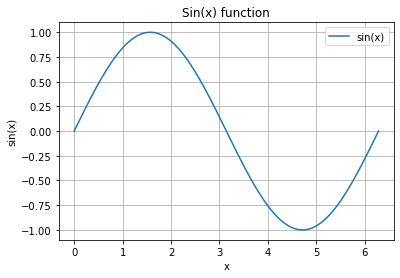

In [42]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig = plt.figure()
plt.plot(x, y, label = 'sin(x)')
plt.legend()
plt.title('Sin(x) function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid()
plt.show()

To draw multiple lines in a plot:

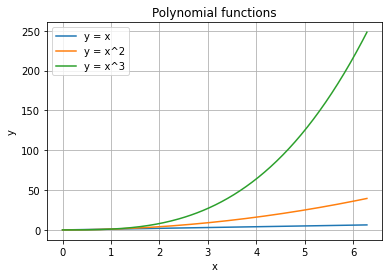

In [43]:
y1 = x
y2 = x**2
y3 = x**3

fig = plt.figure()
plt.plot(x, y1, label = 'y = x')
plt.plot(x, y2, label = 'y = x^2')
plt.plot(x, y3, label = 'y = x^3')
plt.title('Polynomial functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### 1.2 Scatter Plot

Let's use the Boston Housing Dataset again for demonstration.

In [44]:
boston_housing = pd.read_csv(r".\datasets\BostonHousing.csv")
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


To draw the scatter plot for feature "RM" and "MEDV":

- parameter `s` designates the size of the dots
- parameter `alpha` designates the transparency of the dots
- parameter `c` designates the color of the dots

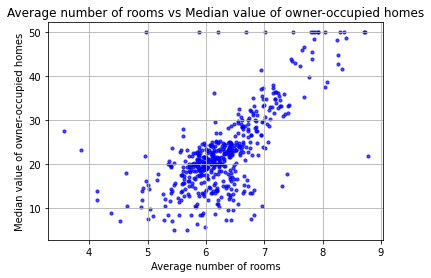

In [45]:
plt.figure()
plt.scatter(x = boston_housing['rm'], y = boston_housing['medv'], s = 10, alpha = 0.7, c = 'blue')
plt.title('Average number of rooms vs Median value of owner-occupied homes')
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of owner-occupied homes')
plt.grid()
plt.show()

#### Quiz

Suppose we set up a linear regression model ($MEDV = \hat \beta_0 + \hat \beta_1 \cdot RM$) to capture the relationship between the independent variable "RM" and the dependent variable "MEDV", where $\hat \beta_0$ is the intercept and $\hat \beta_1$ is the slope.

1. Can you draw both the regression line and the scatters in a same plot? (Don't worry the code for linear regression now, we will discuss it later)

In [46]:
import sklearn.linear_model as lm
model = lm.LinearRegression()
model.fit(boston_housing[['rm']], boston_housing['medv'])
intercept = model.intercept_
coefficient = model.coef_[0]
print('Intercept:', intercept)
print('Coefficient:', coefficient)


Intercept: -34.670620776438554
Coefficient: 9.102108981180308


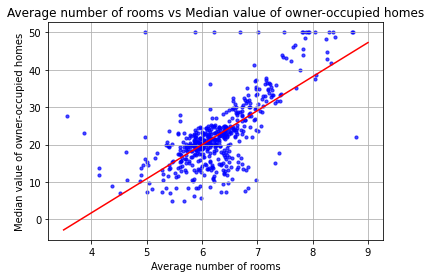

In [47]:
x = np.linspace(3.5, 9, 200)
y = intercept + coefficient*x

plt.figure()
plt.scatter(x = boston_housing['rm'], y = boston_housing['medv'], s = 10, alpha = 0.7, c = 'blue')
plt.plot(x, y, c = 'red')
plt.title('Average number of rooms vs Median value of owner-occupied homes')
plt.xlabel('Average number of rooms')
plt.ylabel('Median value of owner-occupied homes')
plt.grid()
plt.show()

### 1.3 Bar Chart

Bar plots is a good tool to compare measurements over different groups (categories). Let's firstly categorise the MEDV as we've done in the last tutorial and then find out the mean RM for each MEDV level.

In [48]:
# Categorise MEDV into 4 leves
boston_housing['medv_lvl'] = pd.cut(boston_housing['medv'], bins = [0, 15, 25, 40, 60], labels = ['Low', 'Medium', 'High', 'Very High'])
# Group by medv_level and calculate the mean of CRIM
mean_rm = boston_housing.groupby('medv_lvl', observed=False).rm.mean()
mean_rm

medv_lvl
Low          5.878371
Medium       6.092014
High         6.844376
Very High    7.647484
Name: rm, dtype: float64

Then, draw the bar chart:

- parameter `width` designate the bar width
- `plt.xticks()` mapped the bar position to the labels

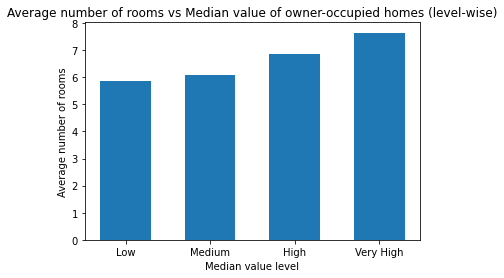

In [49]:
# Generating the x positions as the scales on x axis.
x_positions = np.array(range(len(mean_rm)))
x_label = mean_rm.index

fig = plt.figure()
plt.bar(x = x_positions, height = mean_rm, width = 0.6)
plt.xticks(x_positions, x_label)
plt.title('Average number of rooms vs Median value of owner-occupied homes (level-wise)')
plt.xlabel('Median value level')
plt.ylabel('Average number of rooms')
plt.show()


Bar charts with multiple groups are particularly useful. The above Boston Housing Dataset was collected in 1978, which is kinds of out of date. Let's assume we collected a up-to-date Boston Housing Dataset in 2023, and we want to compare the average number of rooms for the two time points.

In this case, we have to use `plt.subplots()` to generate an advanced figure object.

- `ax.set_xticks()` is to set the ticks' position on x axis for `ax` object.

- `ax.set_xticklabels()` maps elements in language to each tick position for `ax` object.

- `ax.yaxis.grid()` sets the grids in y direction for `ax` object.

- `ax.annotate()` add text/annotation in the chart. Parameter test is the annotation content, xy is position of annotating point and xytext is the postion of annotation content for `ax` object.

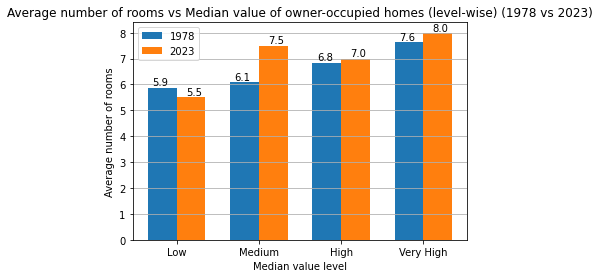

In [50]:
mean_rm_2023 = {"Low": 5.5, "Medium": 7.5, "High": 7, "Very High": 8}

fig,ax=plt.subplots()
barwidth = 0.35
ax.bar(x_positions, mean_rm, barwidth, label='1978')
ax.bar(x_positions+barwidth, mean_rm_2023.values(), barwidth, label='2023')
ax.set_xticks(ticks= x_positions+0.5*barwidth)
ax.set_xticklabels(x_label)
ax.yaxis.grid(True)


# show the value of each bar on the top
for xy in zip(x_positions, mean_rm):
    ax.annotate(text="{:.1f}".format(xy[1]), xy=xy, xytext=(-10, 2), textcoords='offset points')
for xy in zip(x_positions+barwidth, mean_rm_2023.values()):
    ax.annotate(text="{:.1f}".format(xy[1]), xy=xy, xytext=(-5, 2), textcoords='offset points')

plt.title('Average number of rooms vs Median value of owner-occupied homes (level-wise) (1978 vs 2023)')
plt.xlabel('Median value level')
plt.ylabel('Average number of rooms')
plt.legend()
plt.show()

### 1.3 Subplots with Different Plot Types *

Hint: You can explore more great example from the url below:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

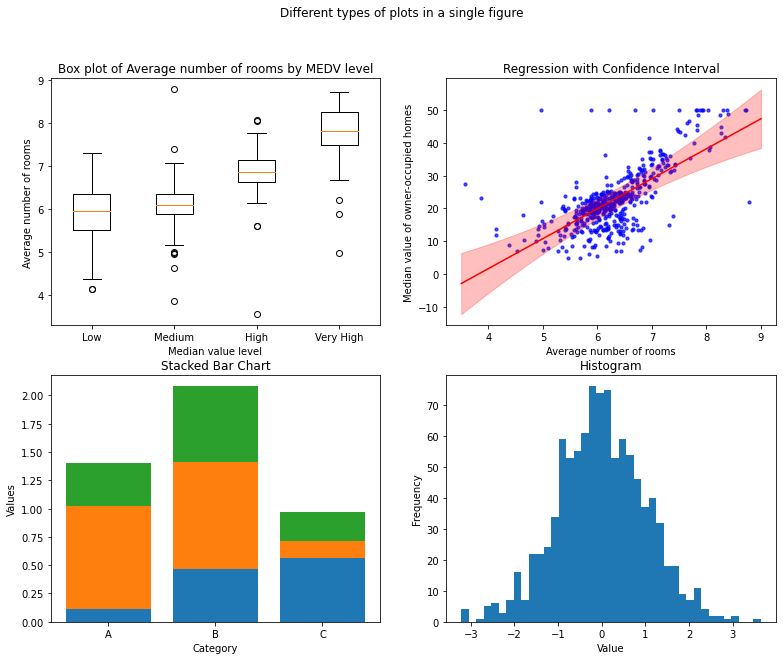

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# subplot 1: Box plot
rm_mdev_low = boston_housing[boston_housing['medv_lvl'] == 'Low']['rm']
rm_mdev_medium = boston_housing[boston_housing['medv_lvl'] == 'Medium']['rm']
rm_mdev_high = boston_housing[boston_housing['medv_lvl'] == 'High']['rm']
rm_mdev_very_high = boston_housing[boston_housing['medv_lvl'] == 'Very High']['rm']
labels = ['Low', 'Medium', 'High', 'Very High']
axes[0, 0].boxplot([rm_mdev_low, rm_mdev_medium, rm_mdev_high, rm_mdev_very_high], labels=labels)
axes[0, 0].set_title('Box plot of Average number of rooms by MEDV level')
axes[0, 0].set_xlabel('Median value level')
axes[0, 0].set_ylabel('Average number of rooms')

# subplot 2: Regression line plot with confidence interval
x = np.linspace(3.5, 9, 200)
axes[0, 1].scatter(x = boston_housing['rm'], y = boston_housing['medv'], s = 10, alpha = 0.7, c = 'blue')
axes[0, 1].plot(x, intercept + coefficient*x, c = 'red')
# Assumed confidence interval
upbound = intercept + coefficient*x + np.abs((x-6.5))**1.8 + 0.3*x + 1
lowbound = intercept + coefficient*x - np.abs((x-6.5))**1.8 - 0.3*x - 1
axes[0, 1].fill_between(x, lowbound, upbound, color='red', alpha=0.25)
axes[0, 1].set_title('Regression with Confidence Interval')
axes[0, 1].set_xlabel('Average number of rooms')
axes[0, 1].set_ylabel('Median value of owner-occupied homes')

# subplot 3: Stacked Bar Chart
x = np.random.rand(3)
y = np.random.rand(3)
z = np.random.rand(3)
data = [x, y, z]

x_ax = np.arange(3)
for i in x_ax:
    axes[1, 0].bar(x_ax, data[i], bottom=np.sum(data[:i], axis=0))
axes[1, 0].set_xticks(x_ax)
axes[1, 0].set_xticklabels(['A', 'B', 'C'])
axes[1, 0].set_title('Stacked Bar Chart')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Values')

# subplot 4: Histogram Graph
data = np.random.randn(1000)
axes[1,1].hist(data, bins=40)
axes[1,1].set_title('Histogram')
axes[1,1].set_xlabel('Value')
axes[1,1].set_ylabel('Frequency')

plt.suptitle("Different types of plots in a single figure")
plt.show()


## 2. Seaborn

`Seaborn` is a powerful Python library for data visualization built on top of Matplotlib. Seaborn provides a high-level interface for creating attractive and informative statistical graphics, making it easier to visualize complex data.

Click [here](https://seaborn.pydata.org/api.html) to get access to its documentation.

### 2.1 Pair Plot

A pair plot allows you to visualize pairwise relationships in a dataset. This is particularly useful for exploring the interactions between different variables.

- parameter `hue` is the variable in data to map plot aspects to different colors.
- parameter `kind` is the kind of plot to make. Options: 'scatter', 'kde', 'hist', 'reg'
- parameter `diag_kind` is the kind of plot for the diagonal subplots. Options: 'auto', 'hist', 'kde', None

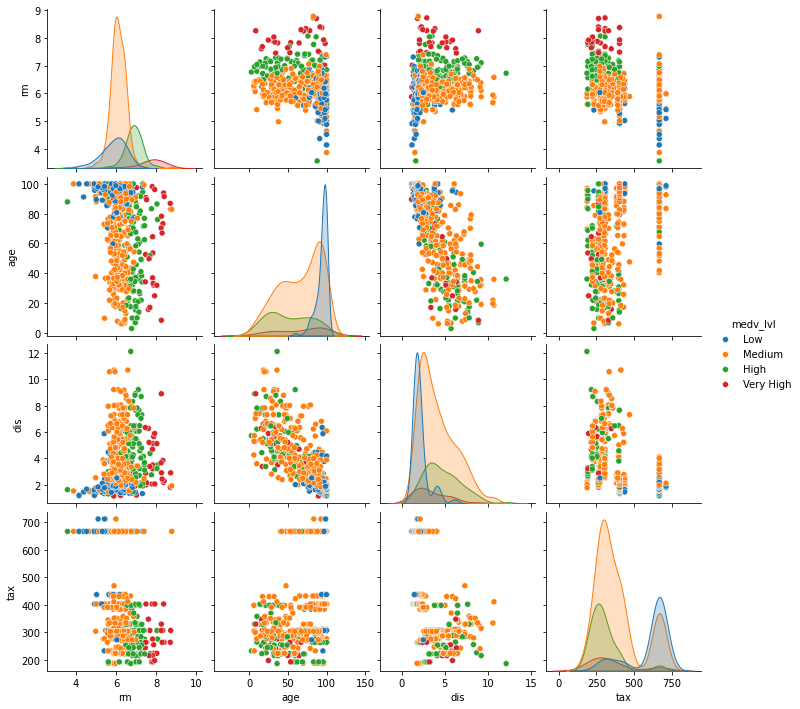

In [52]:
# Select some columns from Boston Housing Dataset for demonstration
columns = ['rm', 'age', 'dis', 'tax', 'medv_lvl']
selected_data = boston_housing[columns]
# Create a pair plot
sns.pairplot(selected_data, hue='medv_lvl', kind = 'scatter', diag_kind="auto")
# Display the plot
plt.show()

#### Quiz

Try to play with other options for parameter `kind` and `diag_kind` to see what happen.

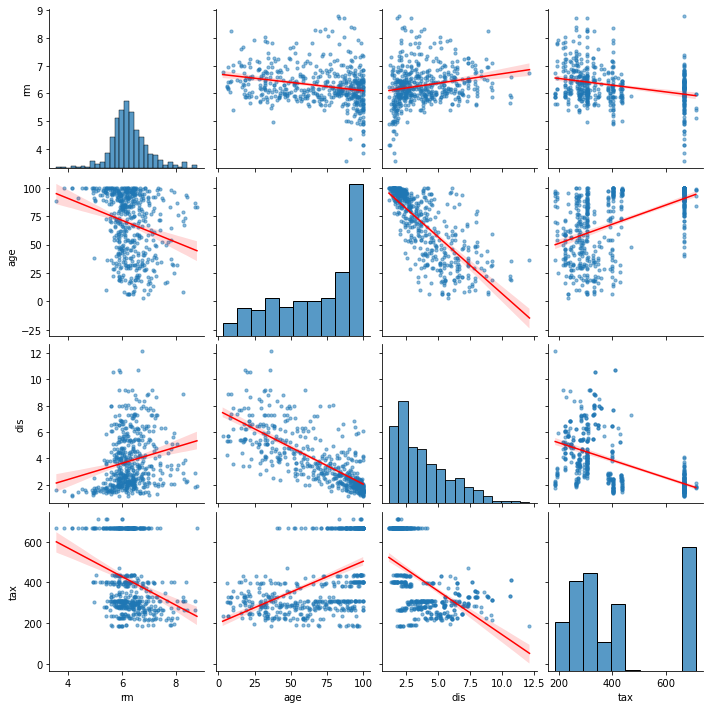

In [53]:
# Create a pair plot
sns.pairplot(selected_data, kind = 'reg', diag_kind="hist", 
             plot_kws={'line_kws':{'color':'red', 'lw' : 1.5}, 'scatter_kws': {'alpha': 0.5, 's': 10}})
# Display the plot
plt.show()

### 2.2 Heatmap

A heatmap is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. This is helpful for identifying patterns and correlations in data.

Let's use the computed correlation matrix from the Boston House Dataset in the last tutorial.

In [54]:
boston_housing = pd.read_csv(r".\datasets\BostonHousing.csv")
corr_matrix = boston_housing.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- parameter `annot` adds the data values to the heatmap.
- parameter `cmap` parameter sets the color map.

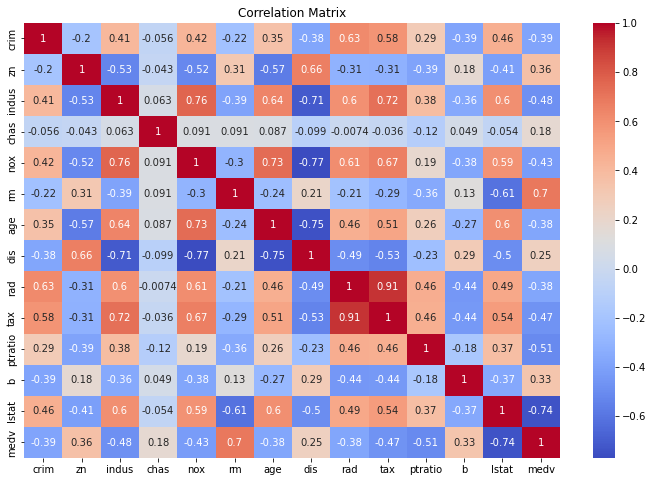

In [55]:
plt.figure(figsize=(12, 8))
sns.heatmap(data = corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()